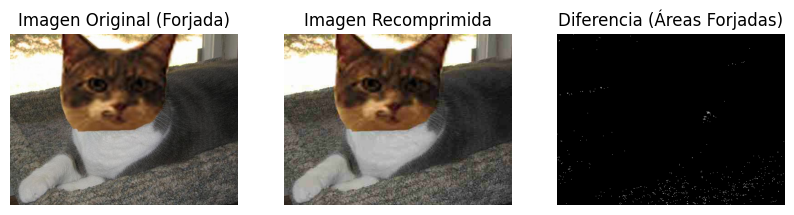

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '../data/CASIA2/Tp2/Tp_D_CRD_S_O_ani10111_ani10103_10635.jpg'

# Cargar la imagen original (forjada)
imagen_original = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Recomprimir la imagen
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 20] # Puedes ajustar la calidad de compresión
_, imagen_recomprimida_encoded = cv2.imencode('.jpg', imagen_original, encode_param)
imagen_recomprimida = cv2.imdecode(imagen_recomprimida_encoded, cv2.IMREAD_COLOR)

# Calcular la diferencia entre la imagen original y la recomprimida
diferencia = cv2.absdiff(imagen_original, imagen_recomprimida)

# Convertir la diferencia a escala de grises para una mejor visualización
diferencia_gris = cv2.cvtColor(diferencia, cv2.COLOR_BGR2GRAY)

# Aplicar un umbral para resaltar las áreas forjadas
_, diferencia_umbral = cv2.threshold(diferencia_gris, 30, 255, cv2.THRESH_BINARY)

# Visualizar las imágenes
plt.figure(figsize=(10, 7))
plt.subplot(1, 3, 1)
plt.title('Imagen Original (Forjada)')
plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Imagen Recomprimida')
plt.imshow(cv2.cvtColor(imagen_recomprimida, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Diferencia (Áreas Forjadas)')
plt.imshow(diferencia_umbral, cmap='gray')
plt.axis('off')

plt.show()


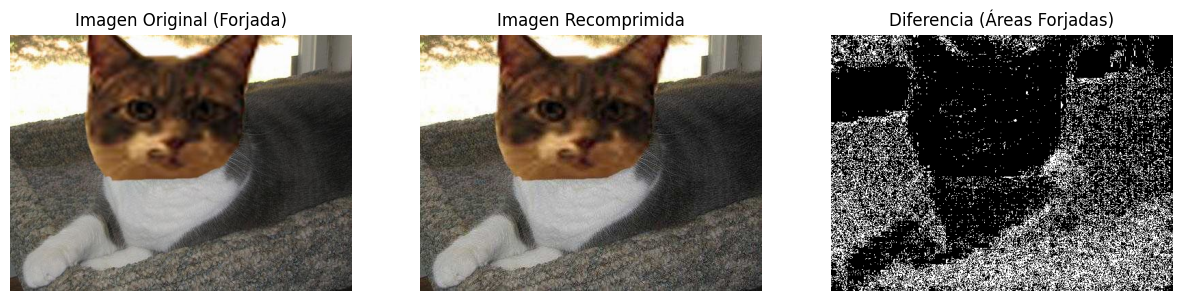

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Parámetros ajustables
calidad_compresion = 50  # Ajusta la calidad de compresión (0-100)
umbral_valor = 5  # Ajusta el valor del umbral (0-255)

# Cargar la imagen original (forjada)
imagen_original = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Verificar que la imagen se haya cargado correctamente
if imagen_original is None:
    raise FileNotFoundError("No se pudo cargar la imagen original. Verifica la ruta del archivo.")

# Recomprimir la imagen
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), calidad_compresion]
_, imagen_recomprimida_encoded = cv2.imencode('.jpg', imagen_original, encode_param)
imagen_recomprimida = cv2.imdecode(imagen_recomprimida_encoded, cv2.IMREAD_COLOR)

# Calcular la diferencia entre la imagen original y la recomprimida
diferencia = cv2.absdiff(imagen_original, imagen_recomprimida)

# Convertir la diferencia a escala de grises para una mejor visualización
diferencia_gris = cv2.cvtColor(diferencia, cv2.COLOR_BGR2GRAY)

# Aplicar un umbral para resaltar las áreas forjadas
_, diferencia_umbral = cv2.threshold(diferencia_gris, umbral_valor, 255, cv2.THRESH_BINARY)

# Ajustar el umbral según sea necesario
if np.max(diferencia_umbral) == 0:
    print("No se detectaron diferencias significativas. Intenta ajustar el umbral o la calidad de compresión.")
else:
    # Visualizar las imágenes
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Imagen Original (Forjada)')
    plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Imagen Recomprimida')
    plt.imshow(cv2.cvtColor(imagen_recomprimida, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Diferencia (Áreas Forjadas)')
    plt.imshow(diferencia_umbral, cmap='gray')
    plt.axis('off')

    plt.show()



In [22]:
# Tamaño de las imágenes
IMG_SIZE = (128, 128)

# Función para comprimir una imagen usando JPEG
def jpeg_compression(image, quality=5):
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
    _, encimg = cv2.imencode('.jpg', image, encode_param)
    decimg = cv2.imdecode(encimg, 1)
    return decimg

# Función para calcular la diferencia entre la imagen original y la recomprimida
def compute_diff(image):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Imagen Original (Forjada)')
    plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    recompressed_image = jpeg_compression(image)

    plt.subplot(1, 3, 2)
    plt.title('Imagen Recomprimida')
    plt.imshow(cv2.cvtColor(imagen_recomprimida, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    diff_image = cv2.absdiff(image.astype(np.uint8), recompressed_image.astype(np.uint8))

    plt.subplot(1, 3, 3)
    plt.title('Diferencia (Áreas Forjadas)')
    plt.imshow(diferencia_umbral, cmap='gray')
    plt.axis('off')

    plt.show()

    return diff_image

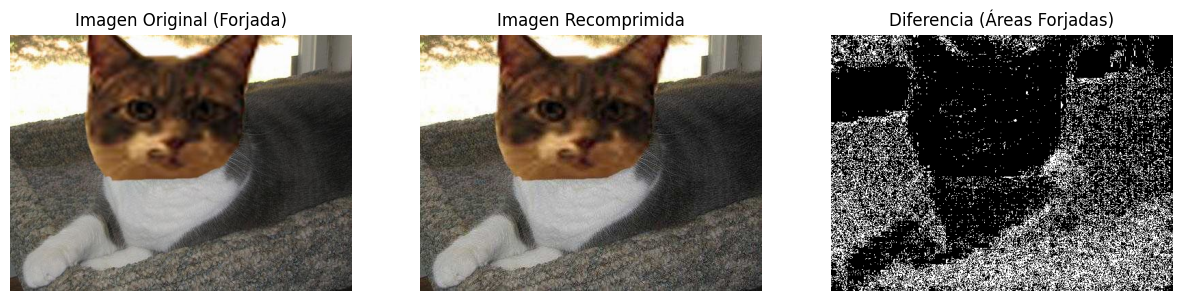

array([[[35, 17, 22],
        [40, 22, 27],
        [43, 23, 28],
        ...,
        [10,  2,  4],
        [ 9,  3,  5],
        [ 8,  4,  6]],

       [[27, 11, 15],
        [25,  8, 14],
        [23,  5, 11],
        ...,
        [10,  2,  4],
        [ 9,  3,  5],
        [ 9,  3,  5]],

       [[19,  7, 12],
        [10,  3,  5],
        [ 2, 11,  3],
        ...,
        [11,  1,  3],
        [10,  2,  4],
        [ 9,  3,  5]],

       ...,

       [[28, 16,  4],
        [27, 15,  3],
        [25, 13,  1],
        ...,
        [13,  9,  8],
        [12,  8,  7],
        [11,  7,  6]],

       [[24, 12,  0],
        [23, 11,  1],
        [21,  9,  3],
        ...,
        [13,  9,  8],
        [13,  9,  8],
        [13,  9,  8]],

       [[18,  6,  6],
        [18,  6,  6],
        [18,  6,  6],
        ...,
        [12,  8,  7],
        [14, 10,  9],
        [15, 11, 10]]], dtype=uint8)

In [23]:
compute_diff(imagen_original)

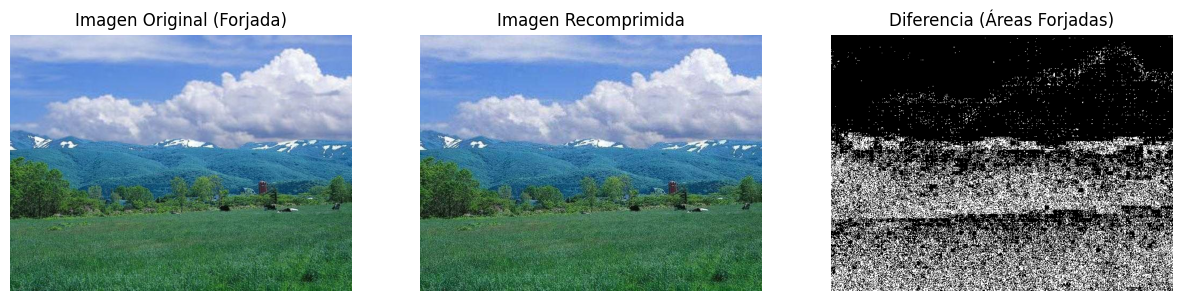

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Parámetros ajustables
calidad_compresion = 50  # Ajusta la calidad de compresión (0-100)
umbral_valor = 5  # Ajusta el valor del umbral (0-255)

# Función para recomprimir la imagen con una calidad específica
def recomprimir_imagen(imagen, calidad):
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), calidad]
    _, imagen_recomprimida_encoded = cv2.imencode('.jpg', imagen, encode_param)
    imagen_recomprimida = cv2.imdecode(imagen_recomprimida_encoded, cv2.IMREAD_COLOR)
    return imagen_recomprimida

image_path = '../data/CASIA2/Tp2/Tp_D_CNN_M_B_nat10139_nat00097_11948.jpg'

# Cargar la imagen original (forjada)
imagen_original = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Verificar que la imagen se haya cargado correctamente
if imagen_original is None:
    raise FileNotFoundError("No se pudo cargar la imagen original. Verifica la ruta del archivo.")

# Recomprimir la imagen
imagen_recomprimida = recomprimir_imagen(imagen_original, calidad_compresion)

# Calcular la diferencia entre la imagen original y la recomprimida
diferencia = cv2.absdiff(imagen_original, imagen_recomprimida)

# Convertir la diferencia a escala de grises para una mejor visualización
diferencia_gris = cv2.cvtColor(diferencia, cv2.COLOR_BGR2GRAY)

# Aplicar un umbral para resaltar las áreas forjadas
_, diferencia_umbral = cv2.threshold(diferencia_gris, umbral_valor, 255, cv2.THRESH_BINARY)

# Ajustar el umbral según sea necesario
if np.max(diferencia_umbral) == 0:
    print("No se detectaron diferencias significativas. Intenta ajustar el umbral o la calidad de compresión.")
else:
    # Visualizar las imágenes
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Imagen Original (Forjada)')
    plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Imagen Recomprimida')
    plt.imshow(cv2.cvtColor(imagen_recomprimida, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Diferencia (Áreas Forjadas)')
    plt.imshow(diferencia_umbral, cmap='gray')
    plt.axis('off')

    plt.show()


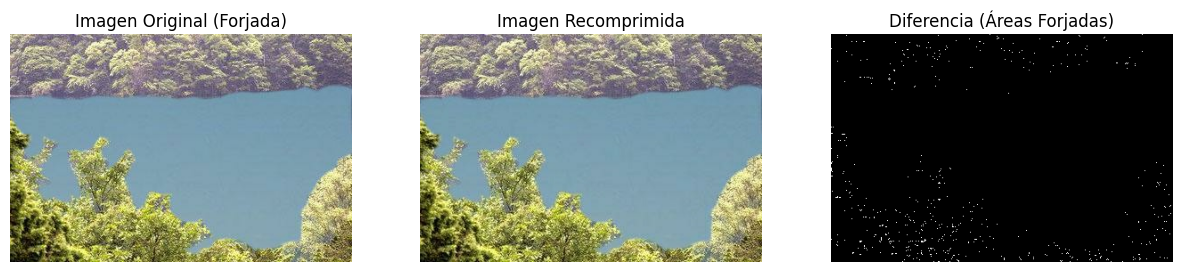

In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Parámetros ajustables
calidad_compresion = 98 # Ajusta la calidad de compresión (0-100)
umbral_valor = 5 # Ajusta el valor del umbral (0-255)

# Función para recomprimir la imagen con una calidad específica
def recomprimir_imagen_tf(imagen, calidad):
    imagen_jpeg = tf.image.encode_jpeg(imagen, quality=calidad)
    imagen_recomprimida = tf.image.decode_jpeg(imagen_jpeg)
    return imagen_recomprimida

image_path = '../data/CASIA2/Tp2/Tp_D_CNN_M_N_nat00089_nat00062_10577.jpg'

# Cargar la imagen original (forjada)
imagen_original = tf.io.read_file(image_path)
imagen_original = tf.image.decode_jpeg(imagen_original, channels=3)

# Recomprimir la imagen
imagen_recomprimida = recomprimir_imagen_tf(imagen_original, calidad_compresion)

# Calcular la diferencia entre la imagen original y la recomprimida
diferencia = tf.abs(tf.cast(imagen_original, tf.int32) - tf.cast(imagen_recomprimida, tf.int32))

# Convertir la diferencia a escala de grises para una mejor visualización
diferencia_gris = tf.image.rgb_to_grayscale(diferencia)

# # Aplicar un umbral para resaltar las áreas forjadas
diferencia_umbral = tf.where(diferencia_gris > umbral_valor, 255, 0)

# Convertir el tensor a numpy para la visualización
imagen_original_np = imagen_original.numpy()
imagen_recomprimida_np = imagen_recomprimida.numpy()
diferencia_umbral_np = diferencia_umbral.numpy()

# Ajustar el umbral según sea necesario
if np.max(diferencia_umbral_np) == 0:
    print("No se detectaron diferencias significativas. Intenta ajustar el umbral o la calidad de compresión.")
else:
    # Visualizar las imágenes
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Imagen Original (Forjada)')
    plt.imshow(imagen_original_np)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Imagen Recomprimida')
    plt.imshow(imagen_recomprimida_np)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Diferencia (Áreas Forjadas)')
    plt.imshow(diferencia_umbral_np.squeeze(), cmap='gray')
    plt.axis('off')

    plt.show()